<a href="https://colab.research.google.com/github/alexlevine1220/datafighter/blob/master/Updatedcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import pathlib
import os
import gc


from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *

In [7]:
!unzip horses-or-humans-dataset.zip
DATA_DIR='horse-or-human/horse-or-human'

Archive:  horses-or-humans-dataset.zip
  inflating: horse-or-human/horse-or-human/train/horses/horse01-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-2.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-3.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-4.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-5.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-6.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-7.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-8.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-9.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-2.png  
  inflating: horse-or-hum

In [8]:
os.listdir(f'{DATA_DIR}')

['train', 'validation']

In [9]:
torch.cuda.is_available()

True

In [0]:
data = ImageDataBunch.from_folder(DATA_DIR, 
                                  train="train",
                                  valid="validation",
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=10, 
                                  num_workers=0).normalize(imagenet_stats)

In [11]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['horses', 'humans']


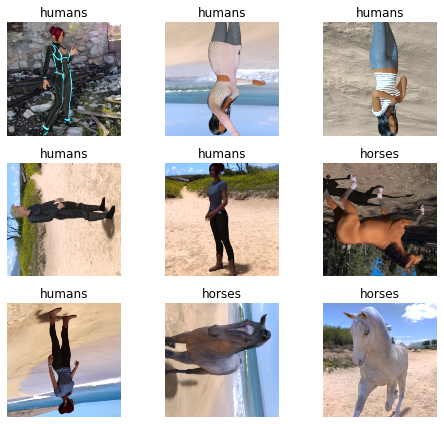

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


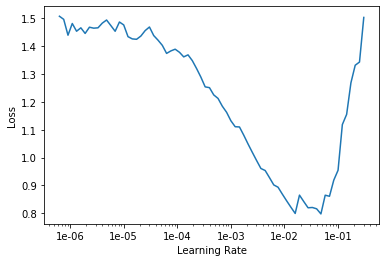

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(6,max_lr=slice(1e-6,1e-2 ))

epoch,train_loss,valid_loss,accuracy,time
0,0.310841,0.092821,0.964844,00:30
1,0.224731,0.100984,0.972656,00:30
2,0.298960,0.104420,0.992188,00:29
3,0.266216,0.092833,0.988281,00:29
4,0.187908,0.128837,0.988281,00:29
5,0.114718,0.057577,0.988281,00:29


In [0]:
learn.save('stage-1')

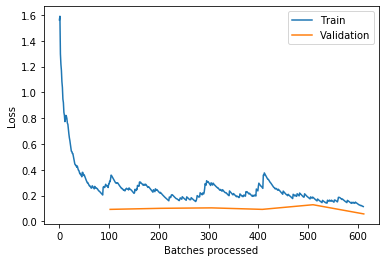

In [17]:
learn.recorder.plot_losses()

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

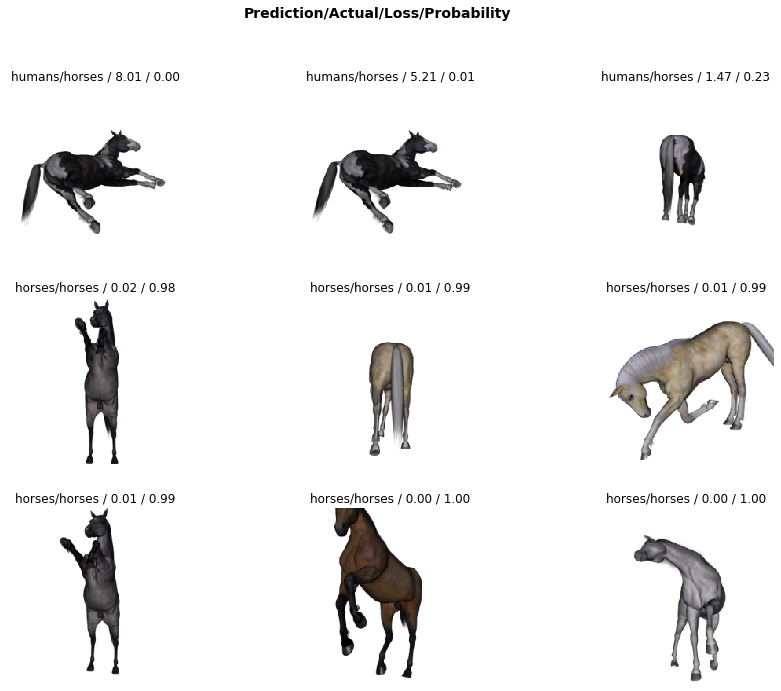

In [19]:
interp.plot_top_losses(9, figsize=(15,11))